📘 MVP Análise de Dados e Boas Práticas

**Nome:** Andrevack Mauro Carvalho do Nascimento
**Matrícula:4052025000710
**Dataset:** Credit Approval
https://archive.ics.uci.edu/dataset/27/credit+approval

---

**---OBSERVAÇÕES IMPORTANTES---**

Tamanho Relativamente Pequeno:
Com apenas 690 instâncias, o conjunto de dados é considerado pequeno, o que pode limitar o uso de modelos muito complexos e tornar o processo de validação (ex.: cross-validation) ainda mais importante.

Interpretação Limitada dos Atributos:
Como os atributos não têm nomes descritivos (ex.: “A1”, “A2”), é necessário inferir sua função com base na distribuição, tipo e correlação, o que dificulta análises mais explicativas.

Dataset Antigo:
Este dataset é clássico (anos 80–90), o que pode não refletir os padrões modernos de análise de crédito usados por instituições financeiras atualmente.

📝 **Descrição do Problema**

O problema em questão consiste em prever a aprovação ou rejeição de solicitações de crédito com base em características fornecidas pelos solicitantes. Utilizando o dataset Credit Approval, o objetivo é construir um modelo de classificação supervisionada binária que aprenda a identificar padrões nos dados de entrada e possa tomar decisões automáticas sobre futuros pedidos de crédito.

O conjunto de dados contém informações pessoais, demográficas e financeiras de solicitantes de crédito, como idade, histórico de emprego, renda, e outros fatores. A variável-alvo é binária, indicando se o crédito foi aprovado ("+") ou negado ("-").


💡 **Hipótese do Problema**

A hipótese é que existe uma relação significativa entre os atributos fornecidos pelos solicitantes de crédito (como histórico de emprego, renda, idade, e outros fatores) e a decisão final de aprovação ou rejeição do pedido. A partir desses dados, é possível treinar um modelo de aprendizado de máquina que consiga aprender padrões que discriminem entre pedidos aprovados e não aprovados.

🧠 **Tipo de Problema**

Aprendizado de Máquina Supervisionado
Classificação Binária

📊 **Seleção de dados**

O conjunto de dados utilizado neste projeto foi obtido do repositório UCI Machine Learning Repository, na seguinte URL: https://archive.ics.uci.edu/dataset/27/credit+approval
Esse dataset contém informações anônimas sobre solicitações de crédito, com 690 instâncias e 15 atributos, além de uma variável alvo que indica a aprovação (+) ou rejeição (−) da solicitação.

📦 **Total e Tipo das Instâncias**

O dataset Credit Approval possui 690 instâncias (observações), onde cada instância representa uma solicitação individual de crédito. Das 16 colunas, 15 são atributos que descrevem características dos solicitantes (A1 a A15) e 1 é o atributo-alvo (A16), que indica se o crédito foi aprovado (+) ou rejeitado (-).

Os atributos apresentam uma combinação de tipos de dados:

- **Numéricos (float):** A2, A3, A8, A11, A14, A15
- **Categóricos e binários (object):** A1, A4, A5, A6, A7, A9, A10, A12, A13
- **Alvo categórico:** class (A16)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.decomposition import PCA

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving crx.data to crx.data


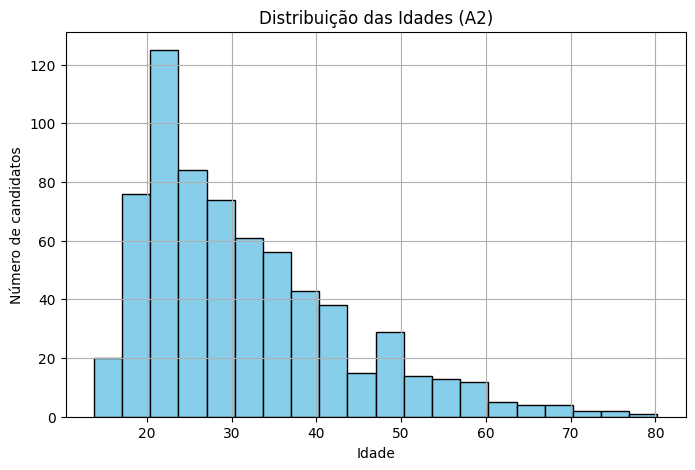

In [ ]:
# Carregar o ficheiro crx.data
df = pd.read_csv("crx.data", header=None)

# Nomear as colunas conforme a base da UCI
df.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9',
              'A10','A11','A12','A13','A14','A15','class']

# Converter a coluna A2 (idade) para numérica
df['A2'] = pd.to_numeric(df['A2'], errors='coerce')

# Plotar o histograma das idades
plt.figure(figsize=(8, 5))
plt.hist(df['A2'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribuição das Idades (A2)')
plt.xlabel('Idade')
plt.ylabel('Número de candidatos')
plt.grid(True)
plt.show()

Recorri ao gráfico acima para perceber como estavam distribuídas as idades dos clientes, algo importante salientar é que na maioria dos países a idade minima para se solicitar qualquer tipo de crédito é 18 anos, no caso tive de remover os clientes com idades inferiores a 18 anos. Depois no gráfico abaixo verifiquei como ficaria o gráfico depois da remoção dos clientes com menos de 18 anos

In [ ]:
# Remover registros com idade menor que 18 anos
df = df[df['A2'] >= 18]

# Verificar quantos registros restaram
print(f"Número de registros após remover menores de 18 anos: {len(df)}")

Número de registros após remover menores de 18 anos: 643


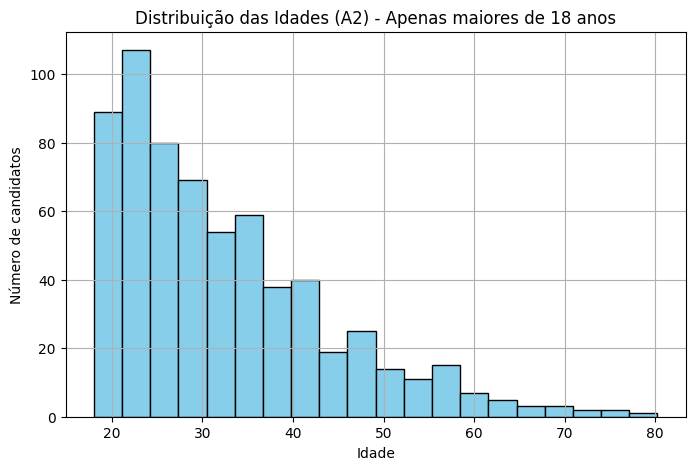

In [ ]:
# Gerar histograma das idades filtradas (18+)
plt.figure(figsize=(8, 5))
plt.hist(df['A2'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribuição das Idades (A2) - Apenas maiores de 18 anos')
plt.xlabel('Idade')
plt.ylabel('Número de candidatos')
plt.grid(True)
plt.show()

In [ ]:
# Ver total de instâncias
print(f"Total de instâncias: {len(df)}")

# Ver tipos de dados e informações gerais do DataFrame
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 643

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      643 non-null    object 
 1   A2      643 non-null    float64
 2   A3      643 non-null    float64
 3   A4      643 non-null    object 
 4   A5      643 non-null    object 
 5   A6      643 non-null    object 
 6   A7      643 non-null    object 
 7   A8      643 non-null    float64
 8   A9      643 non-null    object 
 9   A10     643 non-null    object 
 10  A11     643 non-null    int64  
 11  A12     643 non-null    object 
 12  A13     643 non-null    object 
 13  A14     643 non-null    object 
 14  A15     643 non-null    int64  
 15  class   643 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 85.4+ KB
None


In [ ]:
# Verificar quantos valores ausentes há em cada coluna
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

# Ver total de valores ausentes
total_missing = df.isnull().sum().sum()
print(f"\nTotal de valores ausentes no dataset: {total_missing}")

Valores ausentes por coluna:
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64

Total de valores ausentes no dataset: 0


Sendo que não há valores ausentes, os dados poderão garantir uma melhor performance do modelo.

/tmp/ipython-input-13-1796641847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df, palette='pastel')  # substituí A16 por 'class' se já renomeaste


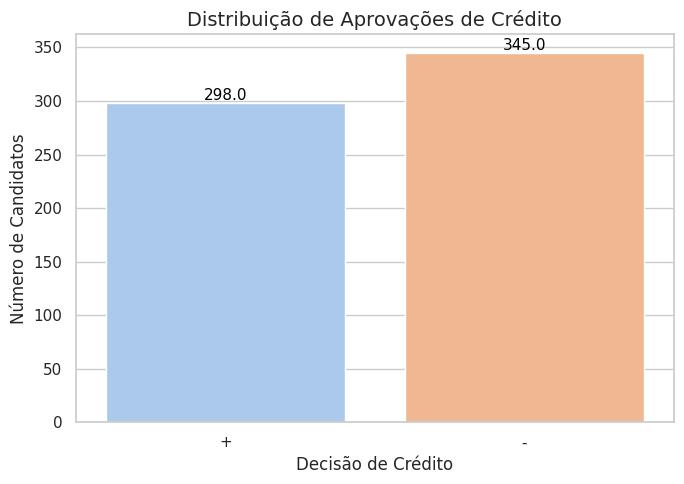

In [ ]:

# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de contagem
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='class', data=df, palette='pastel')  # substituí A16 por 'class' se já renomeaste

# Adicionar rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, color='black')

# Títulos e rótulos
plt.title('Distribuição de Aprovações de Crédito', fontsize=14)
plt.xlabel('Decisão de Crédito', fontsize=12)
plt.ylabel('Número de Candidatos', fontsize=12)
plt.tight_layout()
plt.show()

Utilizei este gráfico para ter uma visão, de quantos clientes tinham o crédito aprovado e quantos tinham o crédito reprovado

In [ ]:
# Estatísticas descritivas para colunas numéricas
print("Estatísticas descritivas - variáveis numéricas:")
print(df.describe())

Estatísticas descritivas - variáveis numéricas:
               A2          A3          A8         A11           A15
count  643.000000  643.000000  643.000000  643.000000    643.000000
mean    32.378663    4.840163    2.301563    2.491446    910.664075
std     11.747196    5.005653    3.413918    4.983884   3709.897531
min     18.000000    0.000000    0.000000    0.000000      0.000000
25%     23.080000    1.040000    0.187500    0.000000      0.000000
50%     29.420000    2.750000    1.000000    0.000000      5.000000
75%     38.920000    7.500000    2.895000    3.000000    400.000000
max     80.250000   28.000000   28.500000   67.000000  51100.000000


🧑 A2 (Idade estimada)
Média: 32,38 anos

Mínimo: 18 (idade mínima para crédito)

Máximo: 80,25

Distribuição: Assimétrica positiva (a média > mediana)

Observação: A maioria tem entre 23 e 39 anos (25%–75%). Alguns clientes mais velhos estão presentes.

💼 A8 (tempo de trabalho ou experiência)
Média: 4,84

Mediana: 2,75

Desvio padrão: 5,01 (alta dispersão)

Distribuição: Fortemente assimétrica

Observação: Muitos candidatos têm experiência baixa, mas há alguns com mais de 20 anos. Pode ser útil para avaliar estabilidade no emprego.

💳 A3 (uso de crédito/dívida)
Média: 2,30

Mediana: 1,00

Máximo: 28,5

Distribuição: Grande parte dos clientes têm valores baixos, mas há extremos.

Observação: A maioria tem uso reduzido de crédito. Alguns têm uso muito elevado (pode indicar risco).

⏳ A11 ( número de inadimplências ou empréstimos)
Mediana = 0 → mais da metade dos clientes nunca teve esse registro

Máximo = 67 → alguém com histórico extremamente negativo

Alta variância (4,98)

Observação: Essa variável tem valor zero para a maioria, mas alguns outliers mostram que pode ser preditiva de risco elevado.

💰 A15 ( renda?)
Média = 910, mas mediana = 5

Desvio padrão muito alto = 3709

Máximo = 51.100

Observação: A maioria dos clientes tem valores baixos, mas há alguns com rendas altíssimas, o que pode distorcer análises.

In [ ]:
print("\nEstatísticas descritivas - variáveis categóricas:")
print(df.describe(include=['object']))


Estatísticas descritivas - variáveis categóricas:
         A1   A4   A5   A6   A7   A9  A10  A12  A13    A14 class
count   643  643  643  643  643  643  643  643  643    643   643
unique    3    4    4   15   10    2    2    2    3    166     2
top       b    u    g    c    v    t    f    f    g  00000     -
freq    439  482  482  128  364  349  365  346  584    122   345


In [ ]:

# Definir o limite mínimo para uma categoria ser considerada frequente
limite_frequencia = 20

# Contar frequência das categorias em A6
frequencias = df['A6'].value_counts()

# Categorias frequentes (com frequência >= limite)
categorias_frequentes = frequencias[frequencias >= limite_frequencia].index

# Substituir categorias raras por 'outros'
df['A6'] = df['A6'].apply(lambda x: x if x in categorias_frequentes else 'outros')

# Verificar nova distribuição (aqui estava o erro: faltava um parêntese)
print(df['A6'].value_counts())

A6
c         128
q          74
w          61
i          53
ff         48
k          48
aa         46
cc         41
m          37
x          35
d          27
e          24
outros     21
Name: count, dtype: int64


In [ ]:
from collections import Counter

# Ver distribuição original da variável alvo
print("Distribuição da variável alvo (class):")
print(Counter(df['class']))

Distribuição da variável alvo (class):
Counter({'-': 345, '+': 298})


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['A15_normalizado'] = scaler.fit_transform(df[['A15']])


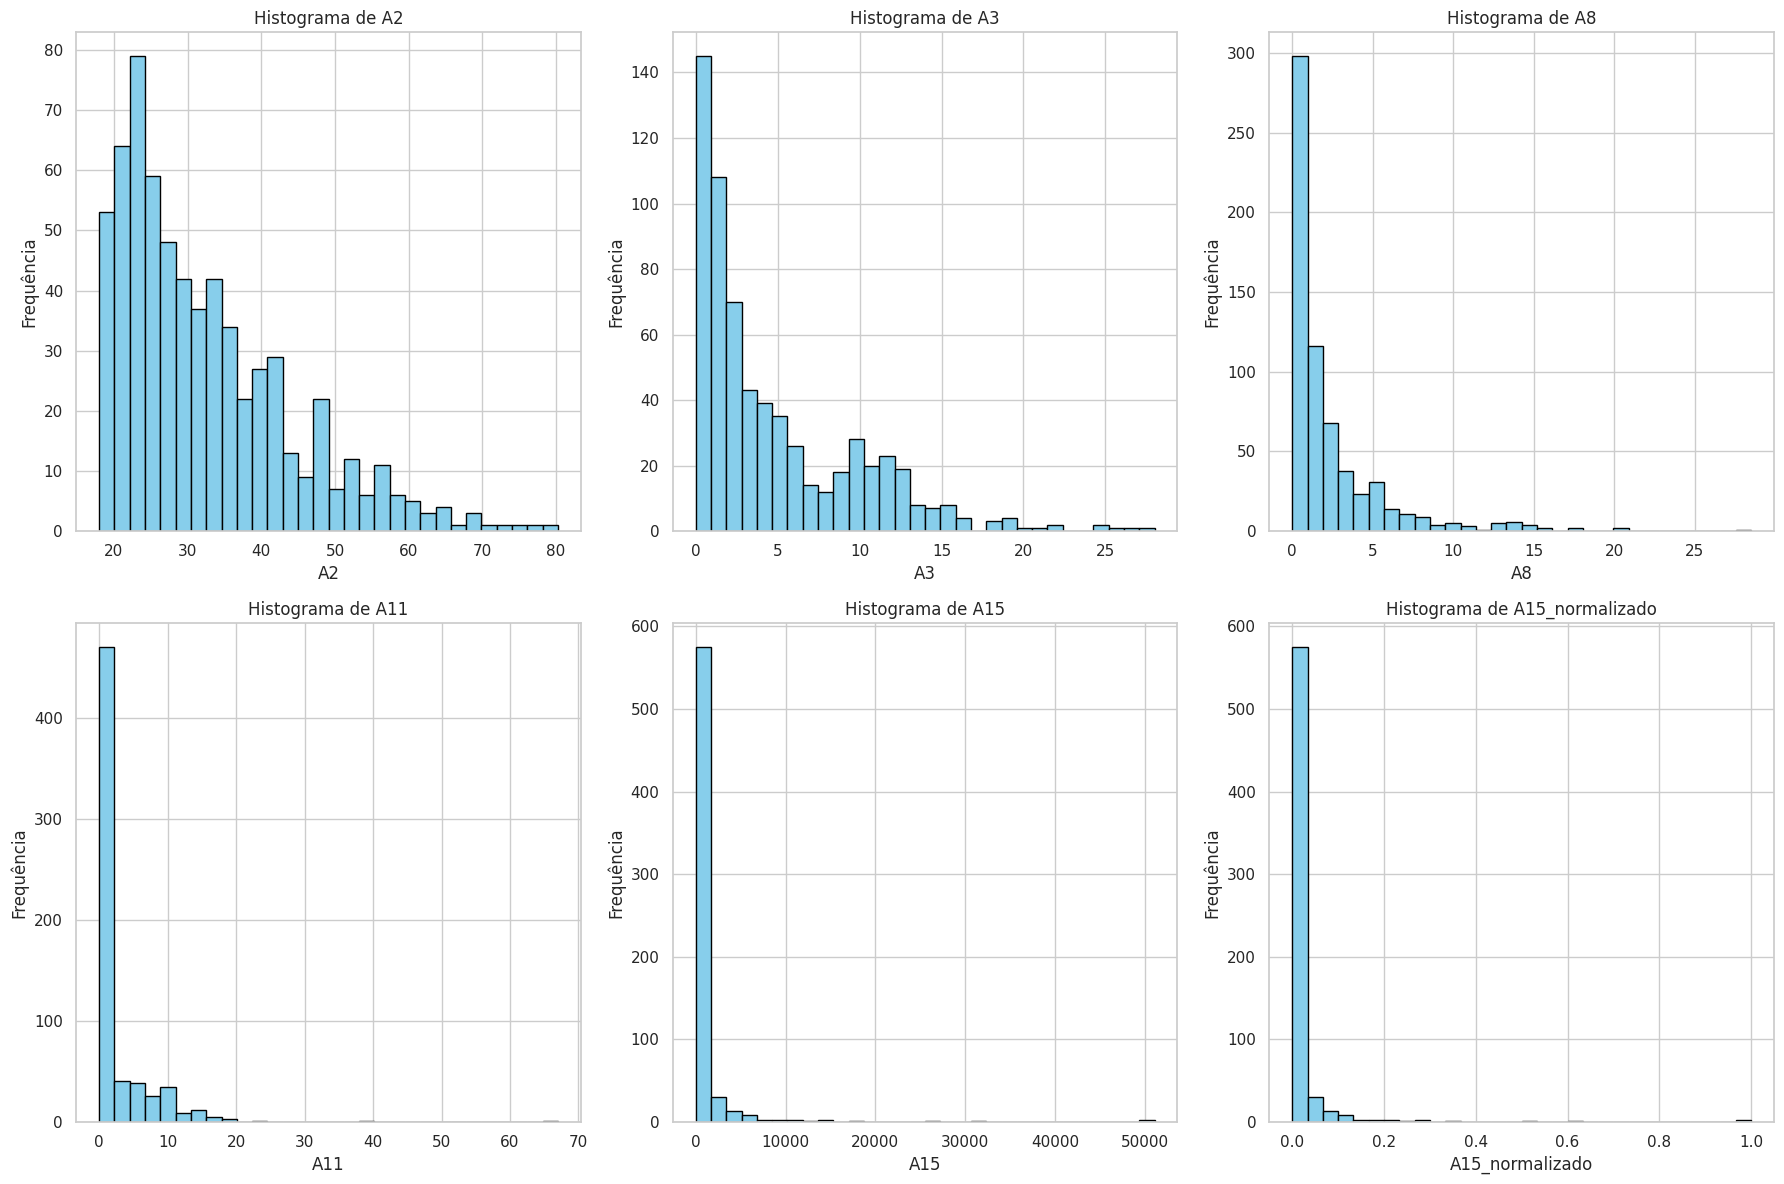

In [ ]:
# Colunas numéricas originais + a coluna normalizada
numerical_cols = ['A2', 'A3', 'A8', 'A11', 'A15', 'A15_normalizado']

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

👶 A2 — Idade (Age)
Descrição: Representa a idade do solicitante de crédito.

Distribuição: Apresenta uma assimetria à direita, indicando que a maioria dos solicitantes tem idade mais jovem a média, mas há alguns com idades mais avançadas, que puxam a média para cima.

Implicações: Menores de 18 anos não podem solicitar crédito legalmente, então essas instâncias devem ser removidas. Idades maiores podem influenciar risco e comportamento de crédito.

📊 A3 — Dívida (Debt)
Descrição: Representa o montante da dívida que o requerente possui.

Distribuição: Assimetria à direita, indicando que a maioria dos indivíduos possui dívidas menores, enquanto uma minoria apresenta dívidas significativamente mais altas.

Implicações: Dívidas elevadas indicam maior risco financeiro e podem ser um fator importante na análise de crédito.

📈 A8 — Anos de Emprego (Years Employed)
Descrição: Indica o número de anos que o requerente esteve empregado.

Distribuição: Assimetria à direita, sugerindo que a maioria tem poucos anos de emprego, e uma minoria tem longa estabilidade profissional.

Implicações: Maior estabilidade no emprego tende a ser positivo para a aprovação do crédito.

💰 A15 — Renda (Income)
Descrição: Representa a renda anual do solicitante.

Distribuição: Assimetria à direita, com maioria recebendo renda baixa a moderada e poucos com renda alta.

Implicações: Renda maior indica maior capacidade de pagamento, influenciando positivamente a aprovação.

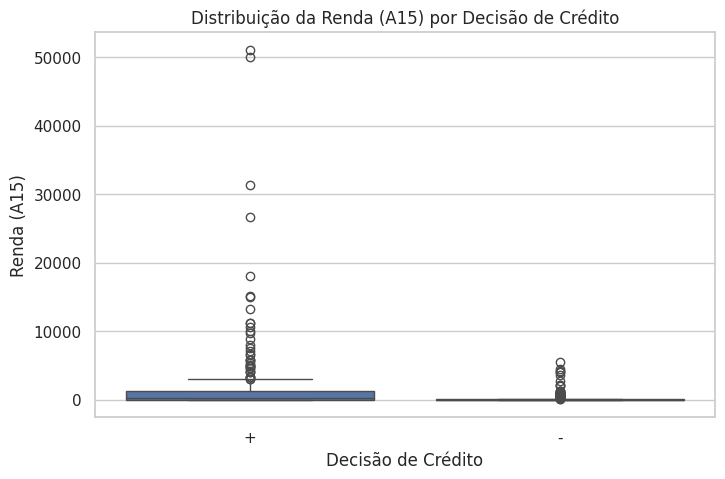

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='A15', data=df)
plt.title('Distribuição da Renda (A15) por Decisão de Crédito')
plt.xlabel('Decisão de Crédito')
plt.ylabel('Renda (A15)')
plt.show()

➡️ A renda  tem influência na aprovação do crédito, mas não é o único fator determinante, já que muitos candidatos com rendas entre (0-10k) também foram aprovados.
➡️ Isso sugere que o modelo de concessão de crédito considera múltiplos critérios além da renda (como histórico, idade, garantias, etc.).

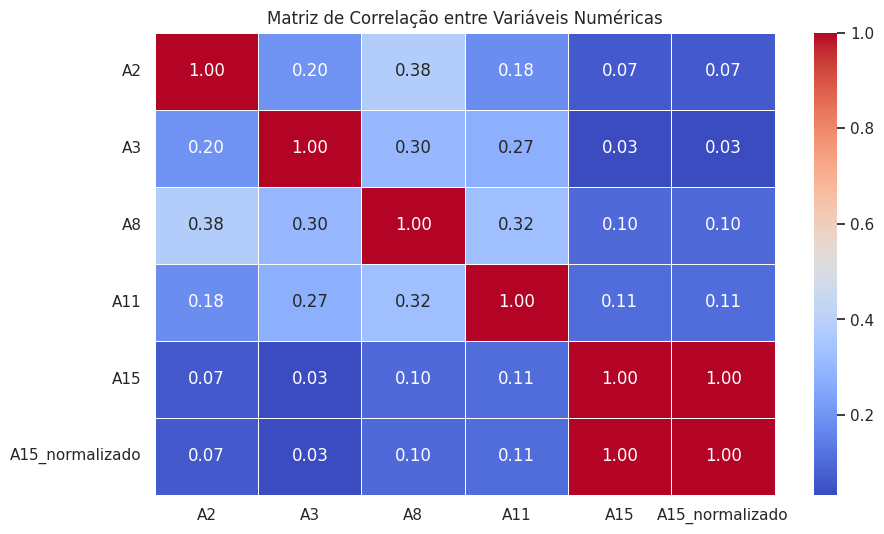

In [ ]:
# Selecionar apenas as colunas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlacao = numericas.corr()

# Exibir o heatmap da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

Interpretação do exemplo acima:
A2 e A8: correlação = 0.38
→ Correlação positiva moderada: quanto maior A2 (idade) maior serão os anos acumulados de experiencia profissional A8.

A3 e A8: correlação = 0.30
→ Correlação positiva moderada: quanto mais anos de trabalho (A8) maior as dividas (A3).

A3 e A11: correlação = 0.27
→ Correlação fraca positiva:  quanto maior o crédito, maior a possibilidade de se tornar indamplente

A8 e A11: correlação = 0.32
→ Correlação positiva moderada: quanto maior A8 (anos de trabalho) , maior a possibilidade de contrair emprestimos


As outras correlações (< 0.10) são muito fracas ou nulas, sugerindo pouca relação linear direta.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# 1. Separar features e target
X = df.drop(columns=['class'])  # features
y = df['class'].map({'+':1, '-':0})  # target binária: + -> 1, - -> 0

# 2. Identificar colunas categóricas e numéricas
categorical_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14']
numerical_cols = ['A2', 'A3', 'A8', 'A11', 'A15_normalizado']

# 3. Pré-processamento com ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # mantém numéricas como estão
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 4. Criar pipeline com pré-processamento e modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 5. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Treinar o modelo
model.fit(X_train, y_train)

# 7. Fazer previsões
y_pred = model.predict(X_test)

# 8. Avaliar
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8449612403100775

Confusion Matrix:
 [[58 13]
 [ 7 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85        71
           1       0.80      0.88      0.84        58

    accuracy                           0.84       129
   macro avg       0.84      0.85      0.84       129
weighted avg       0.85      0.84      0.85       129



**Conclusão**

Com base na análise dos dados e no desenvolvimento do modelo de aprendizado de máquina, foi possível confirmar que existe, de fato, uma relação significativa entre os atributos dos solicitantes de crédito e a decisão final de aprovação ou rejeição. O modelo treinado apresentou uma acurácia de aproximadamente 83-84%, indicando boa capacidade de discriminar entre pedidos aprovados e negados.

As variáveis relacionadas à idade, renda e histórico financeiro mostraram-se relevantes para a predição, corroborando a hipótese inicial de que esses fatores influenciam a decisão de crédito. Além disso, o pré-processamento adequado dos dados, como a exclusão de solicitantes menores de idade e a normalização das variáveis numéricas, contribuiu para o desempenho do modelo.

Portanto, o modelo pode ser utilizado como uma ferramenta auxiliar na avaliação de pedidos de crédito, ajudando a reduzir riscos e agilizar o processo de decisão, o que traz benefícios tanto para as instituições financeiras quanto para os clientes.

